<a href="https://colab.research.google.com/github/KeerthanaM56/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.preprocessing import *
import warnings as wa


ccd=pd.read_csv('/content/creditcard[1].csv')
print(ccd.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
ccd.shape
ccd.info()
ccd.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

0.0    5970
1.0       3
Name: Class, dtype: int64
(5970, 31) (3, 31)


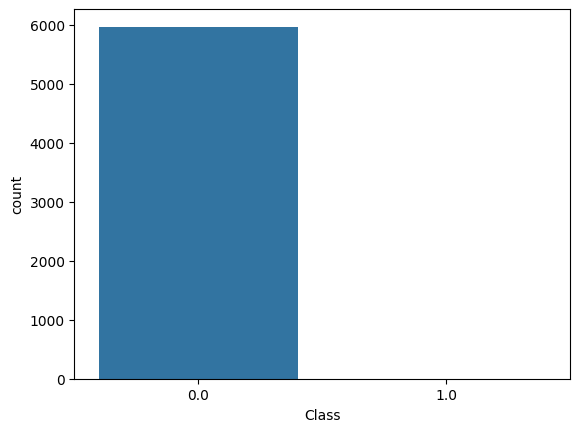

In [3]:
print(ccd['Class'].value_counts())
sns.countplot(x=ccd['Class'])
l=ccd[ccd.Class==0.0]
f=ccd[ccd.Class==1.0]
print(l.shape,f.shape)

In [4]:
print(l.Amount.describe())
print(f.Amount.describe())
ccd.groupby('Class').mean()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64
count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,2677.40201,-0.264965,0.285625,0.844580,0.102656,0.000958,0.195420,0.018542,-0.039195,0.397472,...,0.055426,-0.043268,-0.161540,-0.036683,0.028985,0.089890,-0.040132,0.025238,0.006163,64.965707
1.0,1780.00000,-2.553039,0.184644,-0.293711,2.872264,0.005330,-0.855718,-0.549831,0.308239,-1.093098,...,0.599742,0.294921,-0.177321,0.361160,-0.020311,0.056068,-0.170050,0.015979,-0.086847,256.310000


In [5]:
lsam=l.sample(n=239)
cardd=pd.concat([lsam,f],axis=0)
cardd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3595,3073,-0.548584,0.647927,-0.590784,-3.241789,2.647739,2.924031,0.319644,-0.224865,0.765084,...,0.771417,-0.009922,-0.216549,0.995281,0.252971,-0.818252,0.275449,-0.012249,1.00,0.0
3641,3111,-0.018000,-2.253998,0.601939,0.822545,-1.866757,-0.319242,0.265220,-0.196873,0.928233,...,0.179990,-0.584407,-0.444405,0.863356,-0.096090,0.851263,-0.143558,0.129116,633.49,0.0
1938,1496,1.405879,-0.480540,-0.398656,-1.037347,-0.182117,-0.301716,-0.233248,-0.113180,-1.247156,...,-0.210164,-0.852695,-0.055311,-0.856907,0.458685,-0.478418,-0.028306,-0.002097,45.00,0.0
4339,3761,-0.208444,0.039118,1.879055,-1.512789,-0.348118,-0.956407,0.207447,-0.295465,0.332234,...,-0.080547,-0.024380,0.241918,0.495525,-1.056229,-0.853479,-0.015043,-0.036835,16.00,0.0
3732,3218,1.065388,1.115953,-1.435865,1.828316,0.551806,-2.096344,0.925092,-0.471862,-0.575862,...,-0.123517,-0.401564,-0.215492,0.611963,0.777591,-0.337105,0.030071,0.116642,76.18,0.0


0.0    239
1.0      3
Name: Class, dtype: int64
              Time        V1        V2        V3        V4        V5  \
Class                                                                  
0.0    2746.606695 -0.253865  0.274624  0.892494  0.114284 -0.002775   
1.0    1780.000000 -2.553039  0.184644 -0.293711  2.872264  0.005330   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0.0    0.115864  0.100587 -0.007115  0.338740  ...  0.008450 -0.004238   
1.0   -0.855718 -0.549831  0.308239 -1.093098  ...  0.599742  0.294921   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0.0   -0.105768 -0.057438  0.013626  0.071598 -0.082891  0.043702 -0.008770   
1.0   -0.177321  0.361160 -0.020311  0.056068 -0.170050  0.015979 -0.086847   

           Amount  
Class              
0.0     6

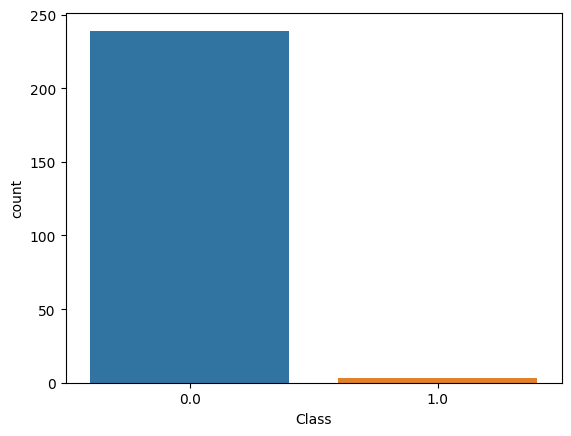

In [6]:
print(cardd['Class'].value_counts())
sns.countplot(x=cardd['Class'])
print(cardd.groupby('Class').mean())

In [7]:
a=cardd.drop(columns='Class',axis=1)
b=cardd['Class']
print(a,b,end='\n')

      Time        V1        V2        V3        V4        V5        V6  \
3595  3073 -0.548584  0.647927 -0.590784 -3.241789  2.647739  2.924031   
3641  3111 -0.018000 -2.253998  0.601939  0.822545 -1.866757 -0.319242   
1938  1496  1.405879 -0.480540 -0.398656 -1.037347 -0.182117 -0.301716   
4339  3761 -0.208444  0.039118  1.879055 -1.512789 -0.348118 -0.956407   
3732  3218  1.065388  1.115953 -1.435865  1.828316  0.551806 -2.096344   
...    ...       ...       ...       ...       ...       ...       ...   
1514  1179  0.657389 -0.643789  0.947302  1.257065 -1.068192 -0.234603   
3797  3307 -1.127687  0.409140  1.882322 -0.140129  0.169928 -0.723562   
541    406 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   

            V7        V8        V9  ...       V20       V21       V22  \
3595  0.319644 -0.224865  0.765084  ..

In [8]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.2,random_state=0)
print(a.shape,atrain.shape,atest.shape)

(242, 30) (193, 30) (49, 30)


In [9]:
cd=LogisticRegression(random_state=0)
cd.fit(atrain,btrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [10]:
atrainpd=cd.predict(atrain)
print(atrainpd)
traindacc=accuracy_score(btrain,atrainpd)
print(traindacc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
1.0


In [11]:
atestpd=cd.predict(atest)
print(atestpd)
testdacc=accuracy_score(btest,atestpd)
print(testdacc)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]
0.9795918367346939
